<a href="https://colab.research.google.com/github/davenust/TinyML/blob/main/hello_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# BUILDING OUR MODEL**




# 1. Importing Dependencies
The first task is to import the dependencies we need. In Jupyter notebooks, code and text are arranged in cells. These are libraries some of codes we will be running will rely on. Our first code cell is located under “Import dependencies.” It sets up all of the libraries that we need to train and convert our model.

In [1]:
# TensorFlow is an open source machine learning library
import tensorflow as tf
# NumPy is a math library
import numpy as np
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# math is Python's math library
import math

# 2. Generating Data (Sine Wave)
Deep learning networks learn to model patterns in underlying data. As we mentioned earlier, we’re going to train a network to model data generated by a sine function. This will result in a model that can take a value, x, and predict its sine, y.

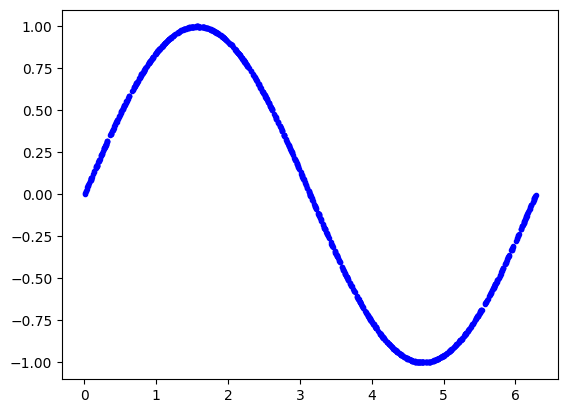

In [2]:
# We'll generate this many sample datapoints
SAMPLES = 1000
# Set a "seed" value, so we get the same random numbers each time we run this
# notebook. Any number can be used here.
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)
# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)
# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)
# Calculate the corresponding sine values
y_values = np.sin(x_values)
# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

The next stope is to make a rough dataset from real world data, as the first dataset will be too easy ML to predic

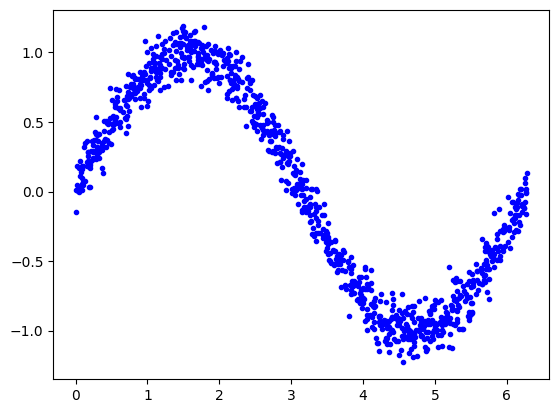

In [3]:
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)
# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

# 3. Spliting Data
The dataset is often split into three parts: training, validation, and test. To evaluate the accuracy of the model we train, we need to compare its predictions to real data and check how well they match up.


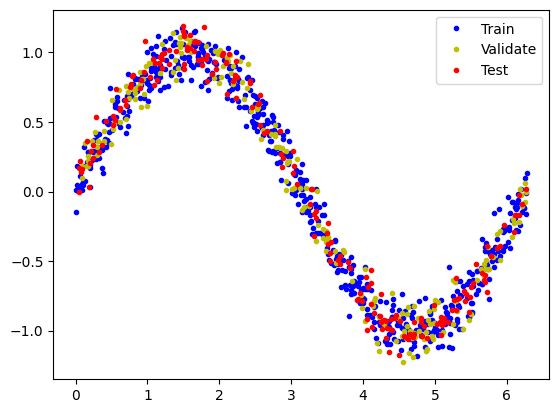

In [4]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])
# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES
# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

# 4. Defining a Basic Model
It’s time to create the model that we’ll train to fit it. The code to do this is actually quite straightforward. It uses Keras, TensorFlow’s highlevel API for creating deep learning networks.

In [5]:
import tensorflow as tf

# Create a simple model architecture
model_1 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 8 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model_1.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1,)))

# Final layer is a single neuron, since we want to output a single value
model_1.add(tf.keras.layers.Dense(1))

# Compile the model using the standard 'adam' optimizer and the mean squared error or 'mse' loss function for regression.
model_1.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [6]:
# Print a summary of the model's architecture
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 5. Training our Model
After we define our model, it’s time to train it and then evaluate its performance to see how well it works. When we see the metrics, we can decide if it’s good enough, or if we should make changes to our design and train it again.
From the predictive training data vs actual data, it has shown that our model has not been able to train the sine wave the proper way but a limited way. Next is to improve our training model by adding another layer

In [7]:
#Training our model
history_1 = model_1.fit(x_train, y_train, epochs=500, batch_size=16, validation_data=(x_validate, y_validate))

Epoch 1/500
38/38 [==============================] - 1s 8ms/step - loss: 0.4376 - mae: 0.5531 - val_loss: 0.4069 - val_mae: 0.5562
Epoch 2/500
38/38 [==============================] - 0s 3ms/step - loss: 0.3695 - mae: 0.5296 - val_loss: 0.3772 - val_mae: 0.5310
Epoch 3/500
38/38 [==============================] - 0s 3ms/step - loss: 0.3423 - mae: 0.5068 - val_loss: 0.3494 - val_mae: 0.5110
Epoch 4/500
38/38 [==============================] - 0s 3ms/step - loss: 0.3175 - mae: 0.4906 - val_loss: 0.3237 - val_mae: 0.4886
Epoch 5/500
38/38 [==============================] - 0s 3ms/step - loss: 0.2924 - mae: 0.4713 - val_loss: 0.2986 - val_mae: 0.4704
Epoch 6/500
38/38 [==============================] - 0s 3ms/step - loss: 0.2711 - mae: 0.4550 - val_loss: 0.2760 - val_mae: 0.4519
Epoch 7/500
38/38 [==============================] - 0s 3ms/step - loss: 0.2515 - mae: 0.4367 - val_loss: 0.2595 - val_mae: 0.4390
Epoch 8/500
38/38 [==============================] - 0s 3ms/step - loss: 0.2366 - m

# 6. Training Metrics
We’re now going to check various metrics to see how well our network has learned.

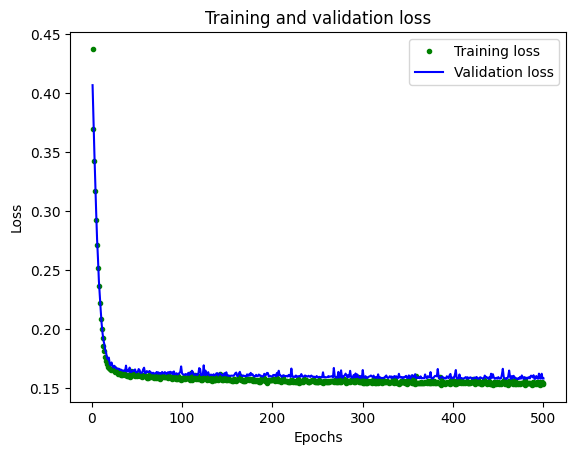

In [8]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

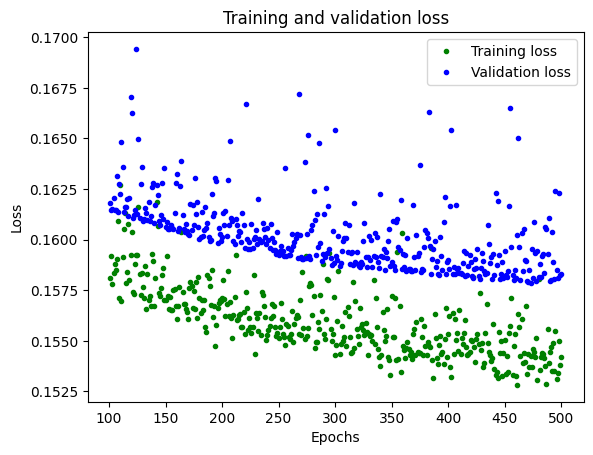

In [9]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

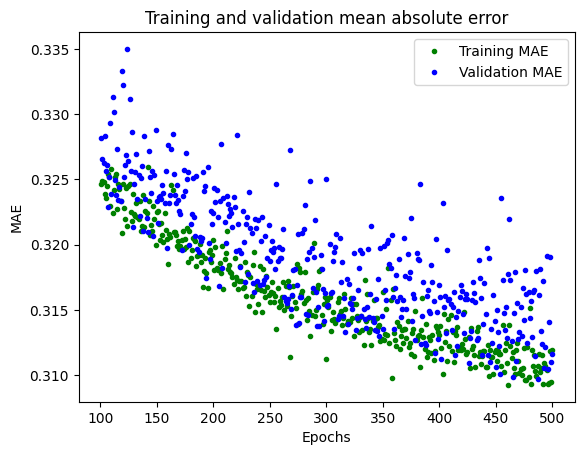

In [10]:
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

19/19 [==============================] - 0s 1ms/step


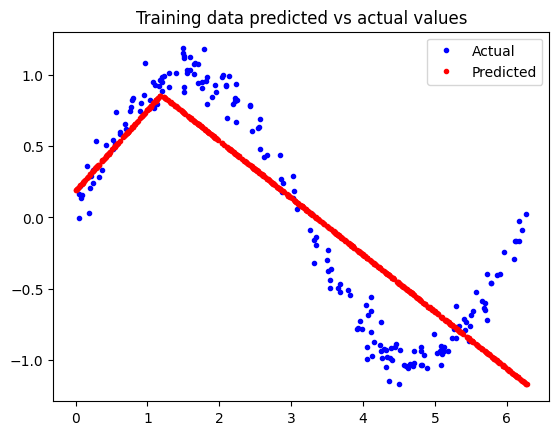

In [11]:
# Use the model to make predictions from our validation data
predictions = model_1.predict(x_train)
# Plot the predictions along with the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [12]:
import tensorflow as tf
model_2 = tf.keras.Sequential()
# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model_2.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1,)))
# The new second layer may help the network learn more complex representations
model_2.add(tf.keras.layers.Dense(16, activation='relu'))
# Final layer is a single neuron, since we want to output a single value
model_2.add(tf.keras.layers.Dense(1))
# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Show a summary of the model
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                32        
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# let now train our model
history_2 = model_2.fit(x_train, y_train, epochs=500, batch_size=16, validation_data=(x_validate, y_validate))

Epoch 1/500
38/38 [==============================] - 4s 35ms/step - loss: 0.4105 - mae: 0.5580 - val_loss: 0.3889 - val_mae: 0.5425
Epoch 2/500
38/38 [==============================] - 1s 14ms/step - loss: 0.3324 - mae: 0.5005 - val_loss: 0.3235 - val_mae: 0.4852
Epoch 3/500
38/38 [==============================] - 1s 14ms/step - loss: 0.2776 - mae: 0.4595 - val_loss: 0.2725 - val_mae: 0.4508
Epoch 4/500
38/38 [==============================] - 1s 15ms/step - loss: 0.2320 - mae: 0.4222 - val_loss: 0.2267 - val_mae: 0.4075
Epoch 5/500
38/38 [==============================] - 0s 5ms/step - loss: 0.1993 - mae: 0.3918 - val_loss: 0.1954 - val_mae: 0.3800
Epoch 6/500
38/38 [==============================] - 0s 5ms/step - loss: 0.1783 - mae: 0.3684 - val_loss: 0.1762 - val_mae: 0.3590
Epoch 7/500
38/38 [==============================] - 0s 3ms/step - loss: 0.1631 - mae: 0.3488 - val_loss: 0.1699 - val_mae: 0.3535
Epoch 8/500
38/38 [==============================] - 0s 3ms/step - loss: 0.1579

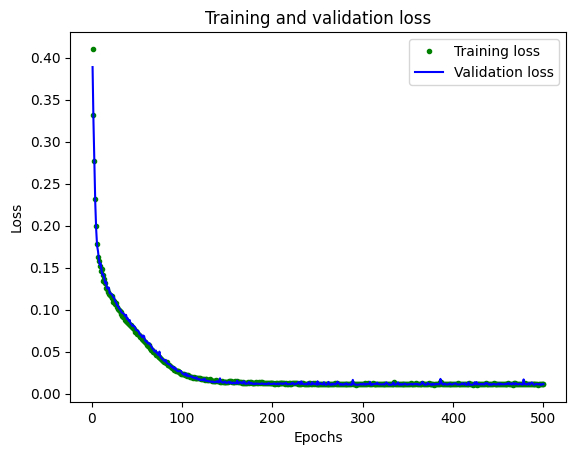

In [14]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

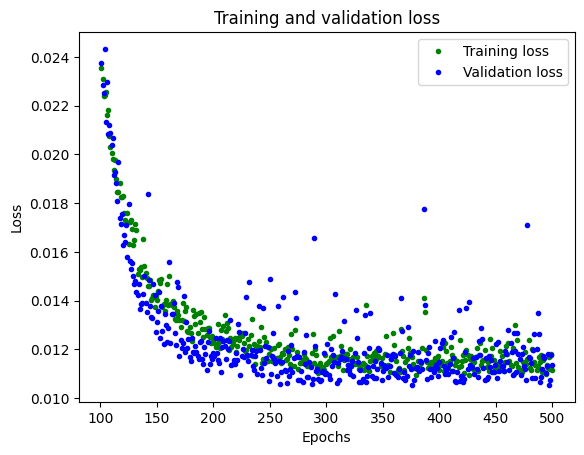

In [15]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100
plt.clf()
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

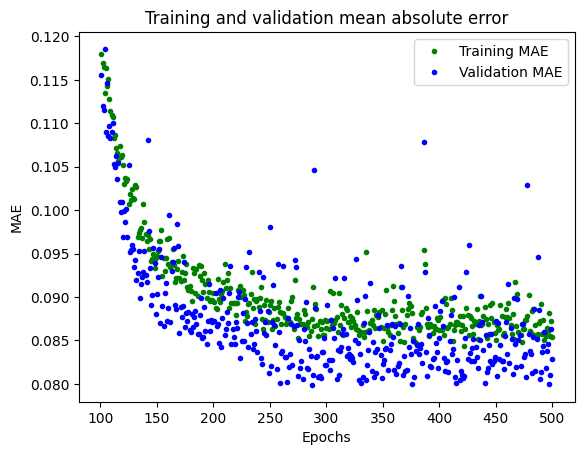

In [16]:
plt.clf()
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

7/7 [==============================] - 0s 2ms/step


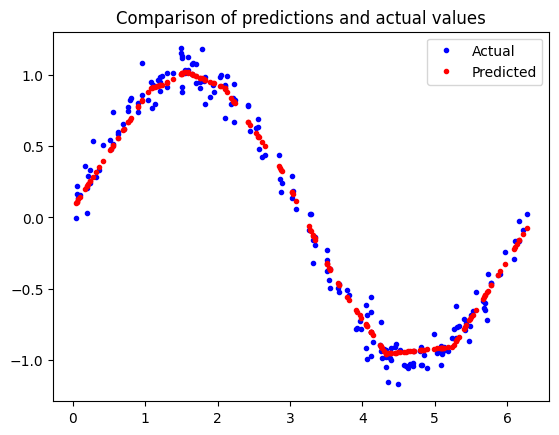

In [17]:
# Calculate and print the loss on our test dataset
loss = model_2.evaluate(x_test, y_test)
# Make predictions based on our test dataset
predictions = model_2.predict(x_test)
# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

Converting the Model for TensorFlow Lite

In [18]:
import tensorflow as tf
import numpy as np

# Define and compile model_2
model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),  # Explicitly define input shape
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])
model_2.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()
# Save the model to disk
with open("sine_model.tflite", "wb") as f:
    f.write(tflite_model)

# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
# Indicate that we want to perform the default optimizations, which include quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Define a generator function that provides our test data's x values as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
    for value in x_test:
        # Each scalar value must be inside of a 2D array that is wrapped in a list
        yield [np.array([value], dtype=np.float32)]

converter.representative_dataset = representative_dataset_generator

# Convert the model
tflite_model_quantized = converter.convert()

# Save the quantized model to disk
with open("sine_model_quantized.tflite", "wb") as f:
    f.write(tflite_model_quantized)

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


In [22]:
def predict_tflite(tflite_model, x_test):
  # Prepare the test data
  x_test_ = x_test.copy()
  x_test_ = x_test_.reshape((x_test.size, 1))
  x_test_ = x_test_.astype(np.float32)

  # Initialize the TFLite interpreter
  interpreter = tf.lite.Interpreter(model_content=tflite_model,
                                    experimental_op_resolver_type=tf.lite.experimental.OpResolverType.BUILTIN_REF)
  interpreter.allocate_tensors()

  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  # If required, quantize the input layer (from float to integer)
  input_scale, input_zero_point = input_details["quantization"]
  if (input_scale, input_zero_point) != (0.0, 0):
    x_test_ = x_test_ / input_scale + input_zero_point
    x_test_ = x_test_.astype(input_details["dtype"])

  # Invoke the interpreter
  y_pred = np.empty(x_test_.size, dtype=output_details["dtype"])
  for i in range(len(x_test_)):
    interpreter.set_tensor(input_details["index"], [x_test_[i]])
    interpreter.invoke()
    y_pred[i] = interpreter.get_tensor(output_details["index"])[0]

  # If required, dequantized the output layer (from integer to float)
  output_scale, output_zero_point = output_details["quantization"]
  if (output_scale, output_zero_point) != (0.0, 0):
    y_pred = y_pred.astype(np.float32)
    y_pred = (y_pred - output_zero_point) * output_scale

  return y_pred

def evaluate_tflite(tflite_model, x_test, y_true):
  global model
  y_pred = predict_tflite(tflite_model, x_test)
  loss_function = tf.keras.losses.get(model.loss)
  loss = loss_function(y_true, y_pred).numpy()
  return loss

In [30]:
# Instantiate an interpreter for each model
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')
# Allocate memory for each model
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()
# Get indexes of the input and output tensors
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0] ["index"]
sine_model_quantized_output_index = \
  sine_model_quantized.get_output_details()[0]["index"]

# Create arrays to store the results
sine_model_predictions = []
sine_model_quantized_predictions = []

# Run each model's interpreter for each value and store the results in arrays
for x_value in x_test:
  # Create a 2D tensor wrapping the current x value
  x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32)
  # Write the value to the input tensor
  sine_model.set_tensor(sine_model_input_index, x_value_tensor)
  # Run inference
  sine_model.invoke()
  # Read the prediction from the output tensor
sine_model_predictions.append(
  sine_model.get_tensor(sine_model_output_index)[0])
# Do the same for the quantized model
sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor)
sine_model_quantized.invoke()
sine_model_quantized_predictions.append(sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])

ValueError: x and y must have same first dimension, but have shapes (200,) and (1, 1)

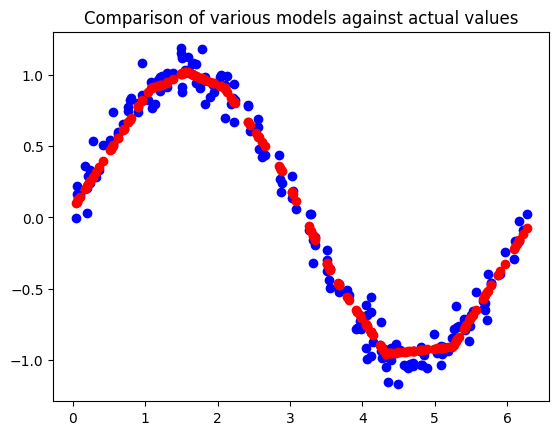

In [31]:
# Plot the results
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, sine_model_predictions, 'bx', label='Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', label='Lite quantized predictions')
plt.legend()
plt.show()

In [32]:
import os
basic_model_size = os.path.getsize("sine_model.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("sine_model_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)

Basic model is 2740 bytes
Quantized model is 2488 bytes
Difference is 252 bytes


# **Converting to a C File:**
Converting to a C File: The final step in preparing our model for use with TensorFlow Lite for Microcontrollers is to convert it into a C source file that can be included in our application.

In [33]:
# Install xxd if it is not available
!apt-get -qq install xxd
# Save the file as a C source file
!xxd -i sine_model_quantized.tflite > sine_model_quantized.cc
# Print the source file
!cat sine_model_quantized.cc

unsigned char sine_model_quantized_tflite[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00,
  0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x80, 0x00, 0x00, 0x00, 0xd8, 0x00, 0x00, 0x00, 0xf0, 0x02, 0x00, 0x00,
  0x00, 0x03, 0x00, 0x00, 0x30, 0x09, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0xbe, 0xfc, 0xff, 0xff,
  0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x38, 0x00, 0x00, 0x00,
  0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76, 0x69, 0x6e, 0x67, 0x5f,
  0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x9c, 0xff, 0xff, 0xff, 0x08, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x07, 0x00, 0x00, 0x00, 0x64, 0x65, 0x6e, 0x73,
  0x65, 0x5f, 0x37, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x9e, 0xfd, 0xff, 0xff, 0x04, 0x00, 0x00, 0x00, 0x07, 0x00, 0x